<h2>Step 1: Import Libraries & Dataset</h2>

In [2]:
import pandas as pd
import numpy as np

<h2>Load the dataset</h2>

In [3]:
df = pd.read_csv('/content/OCD_Patient.csv')

 <h2>Step 2: Explore the Dataset</h2>

<h2>Display the first few rows of the datase</h2>

In [4]:
print(df.head())

   PatientID  Age  Gender Ethnicity Marital Status Education Level  \
0       1018   32  Female   African         Single    Some College   
1       2406   69    Male   African       Divorced    Some College   
2       1188   57    Male  Hispanic       Divorced  College Degree   
3       6200   27  Female  Hispanic        Married  College Degree   
4       5824   56  Female  Hispanic        Married     High School   

  OCD Diagnosis Date  Duration of Symptoms (months) Previous Diagnoses  \
0         15-07-2016                            203                MDD   
1         28-04-2017                            180                NaN   
2         02-02-2018                            173                MDD   
3         25-08-2014                            126               PTSD   
4         20-02-2022                            168               PTSD   

  Family History of OCD Obsession Type Compulsion Type  \
0                    No   Harm-related        Checking   
1                 

<h2>Get a summary of the dataset</h2>

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   PatientID                      1500 non-null   int64 
 1   Age                            1500 non-null   int64 
 2   Gender                         1500 non-null   object
 3   Ethnicity                      1500 non-null   object
 4   Marital Status                 1500 non-null   object
 5   Education Level                1500 non-null   object
 6   OCD Diagnosis Date             1500 non-null   object
 7   Duration of Symptoms (months)  1500 non-null   int64 
 8   Previous Diagnoses             1252 non-null   object
 9   Family History of OCD          1500 non-null   object
 10  Obsession Type                 1500 non-null   object
 11  Compulsion Type                1500 non-null   object
 12  Y-BOCS Score (Obsessions)      1500 non-null   int64 
 13  Y-B

In [6]:
print(df.describe())

         PatientID          Age  Duration of Symptoms (months)  \
count  1500.000000  1500.000000                    1500.000000   
mean   5541.254000    46.781333                     121.745333   
std    2562.389469    16.830321                      67.404610   
min    1017.000000    18.000000                       6.000000   
25%    3338.000000    32.000000                      64.000000   
50%    5539.500000    47.000000                     121.000000   
75%    7745.500000    61.000000                     178.000000   
max    9995.000000    75.000000                     240.000000   

       Y-BOCS Score (Obsessions)  Y-BOCS Score (Compulsions)  
count                1500.000000                  1500.00000  
mean                   20.048000                    19.62600  
std                    11.823884                    11.78287  
min                     0.000000                     0.00000  
25%                    10.000000                     9.00000  
50%                    20.0

<Axes: >

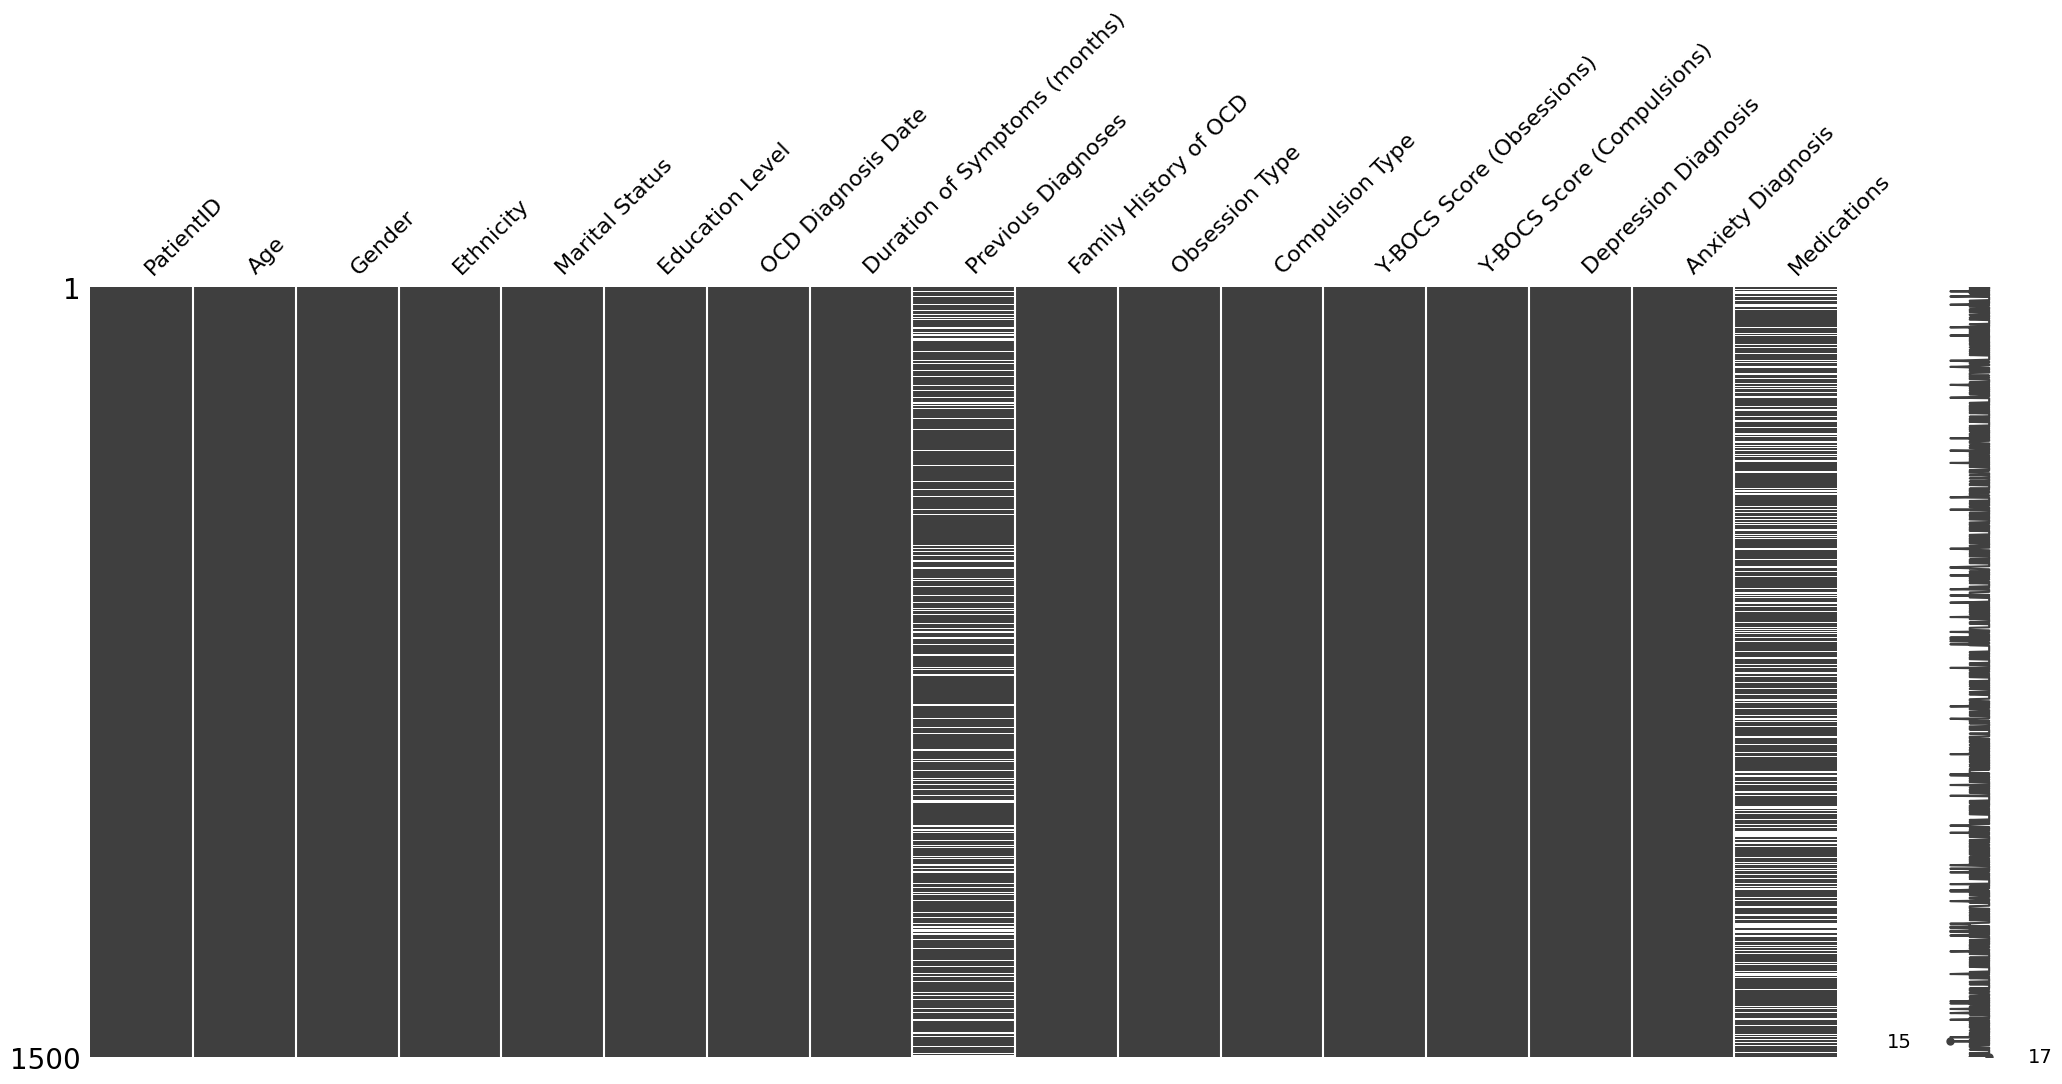

In [7]:
import missingno as msno
msno.matrix(df)

#A white bar indicates missing data.
#A black bar indicates the presence of data.

<h2>Step 3: Handle Missing Values</h2>

In [8]:
df['Previous Diagnoses'].fillna(df['Previous Diagnoses'].mode()[0], inplace=True)
df['Medications'].fillna('Unknown', inplace=True)

/tmp/ipython-input-3319996482.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Previous Diagnoses'].fillna(df['Previous Diagnoses'].mode()[0], inplace=True)
/tmp/ipython-input-3319996482.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].met

<h2>Step 4: Visualize Demographics</h2>

<h2>Countplot</h2>

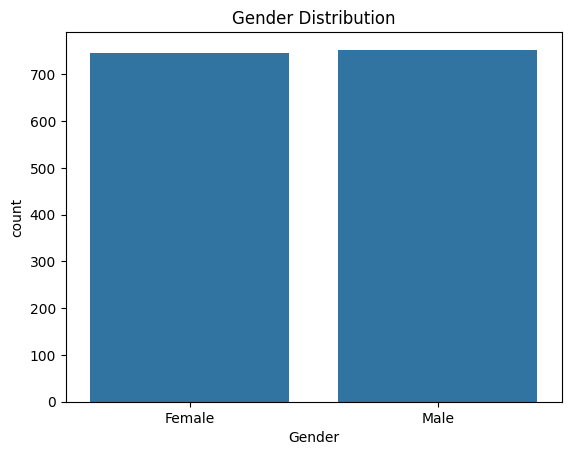

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df, x='Gender')
plt.title("Gender Distribution")
plt.show()

<h2>Histplot</h2>

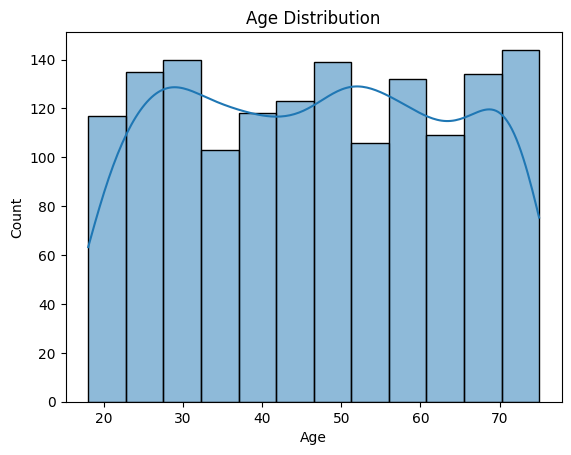

In [10]:
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()

<h2>Step 5: Clinical Data Visualizations</h2>

<h2>Histplot</h2>

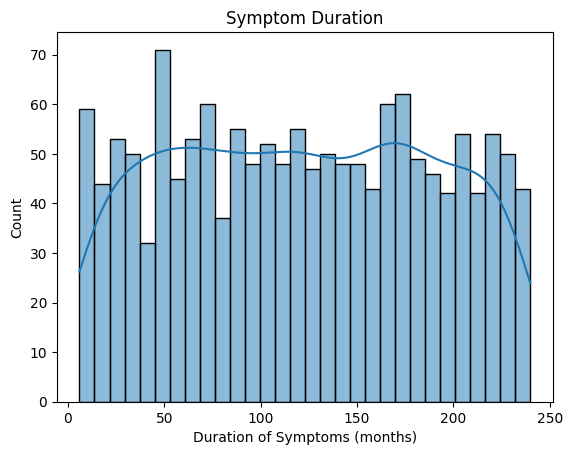

In [11]:
sns.histplot(df['Duration of Symptoms (months)'], bins=30, kde=True)
plt.title("Symptom Duration")
plt.show()

<h2>Boxplot</h2>

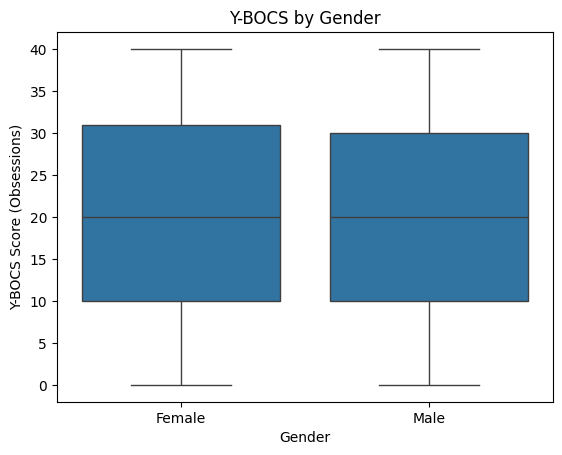

In [12]:
sns.boxplot(x='Gender', y='Y-BOCS Score (Obsessions)', data=df)
plt.title("Y-BOCS by Gender")
plt.show()

<h2>Step 6: Encode Categorical Features</h2>

In [13]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['Gender', 'Ethnicity', 'Marital Status', 'Education Level',
              'Previous Diagnoses', 'Family History of OCD',
              'Obsession Type', 'Compulsion Type',
              'Depression Diagnosis', 'Anxiety Diagnosis', 'Medications']

for col in label_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

<h2>Step 7: Feature Correlation</h2>

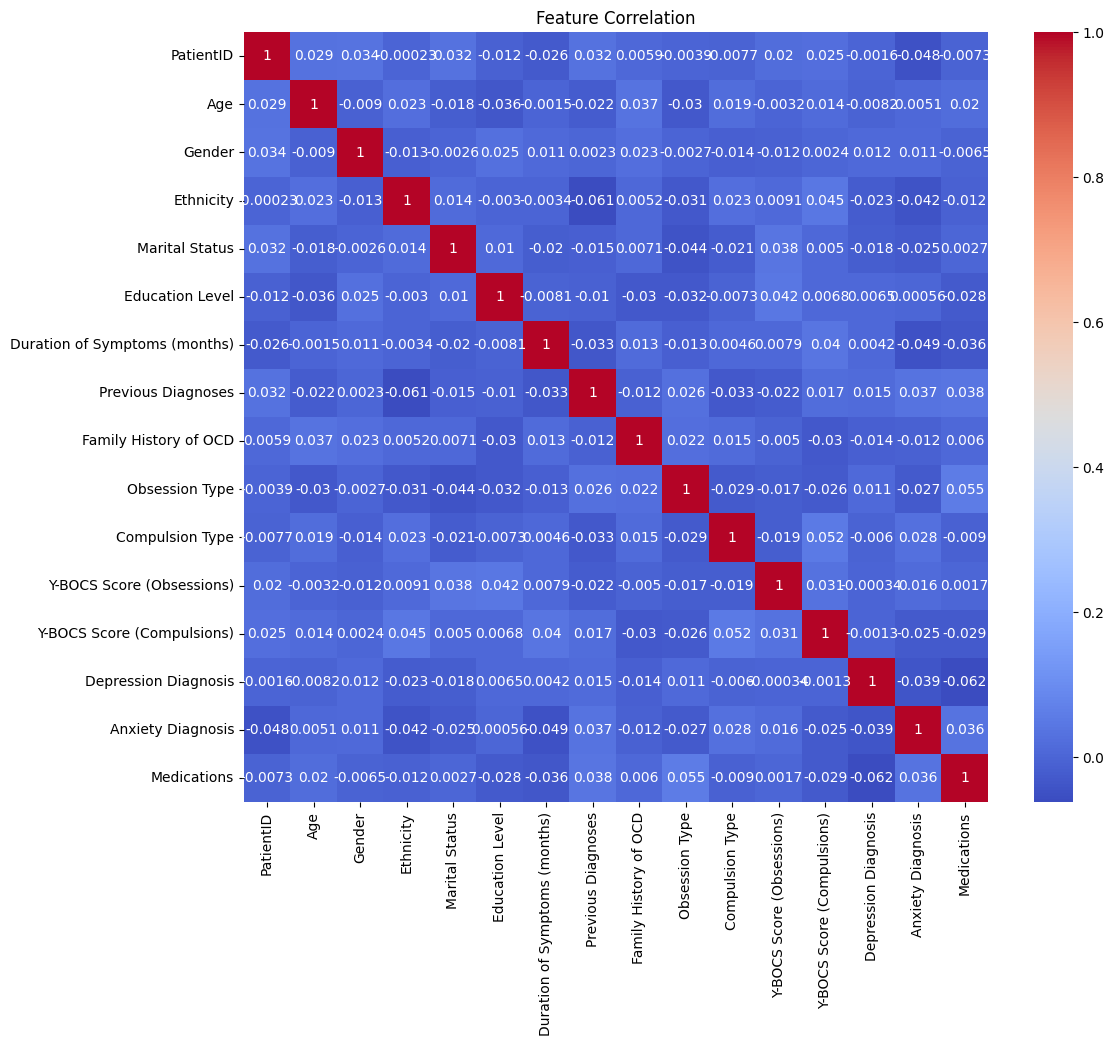

In [16]:
plt.figure(figsize=(12,10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

<h2>Step 8: Feature Importance (XGBoost)</h2>

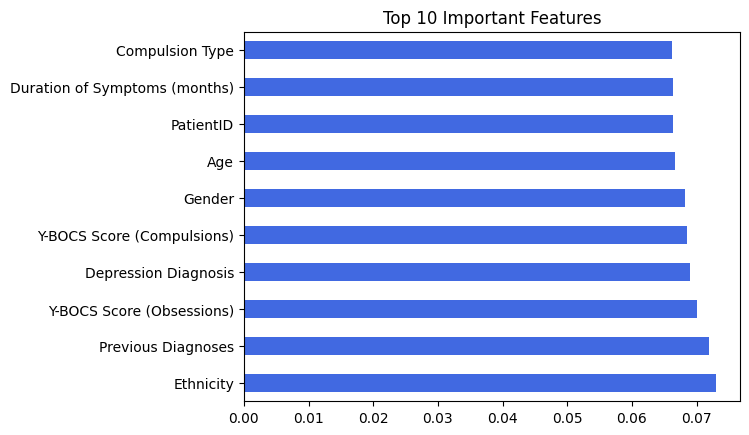

In [17]:
from xgboost import XGBClassifier

X = df.drop(columns=['Medications', 'OCD Diagnosis Date'])
y = df['Medications']

model = XGBClassifier()
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh', color='royalblue')
plt.title("Top 10 Important Features")
plt.show()

<h2>Step 9: Train-Test Split + Scaling</h2>

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<h2>Step 10: Model Comparison (Voting Classifier)</h2>

Voting Classifier Accuracy: 23.67%


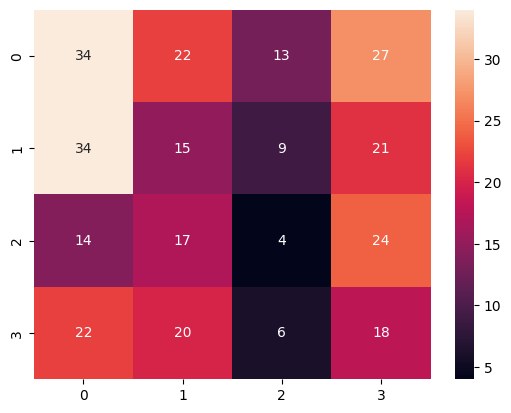

In [19]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = XGBClassifier()

voting_clf = VotingClassifier(estimators=[
    ('lr', clf1), ('rf', clf2), ('xgb', clf3)
], voting='hard')

voting_clf.fit(X_train_scaled, y_train)
y_pred = voting_clf.predict(X_test_scaled)

print(f"Voting Classifier Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

<h2>Y-BOCS Score Distribution by Obsession Type</h2>

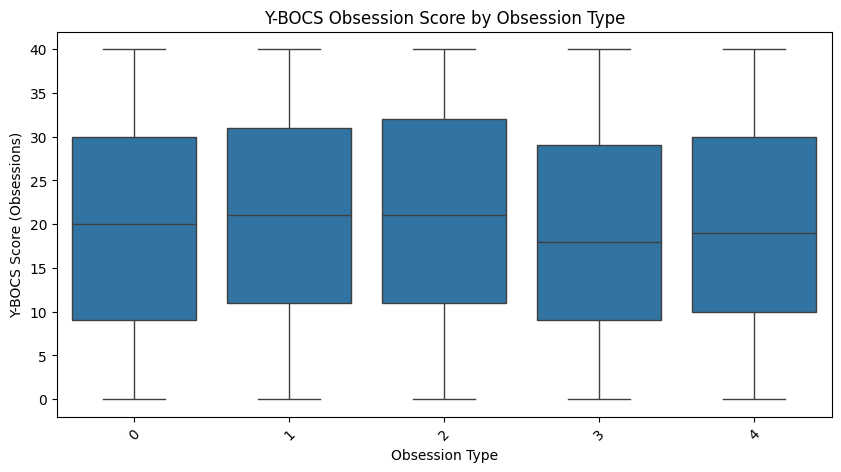

In [20]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Obsession Type', y='Y-BOCS Score (Obsessions)', data=df)
plt.title("Y-BOCS Obsession Score by Obsession Type")
plt.xticks(rotation=45)
plt.show()

<h2>Count of Patients per Medication</h2>

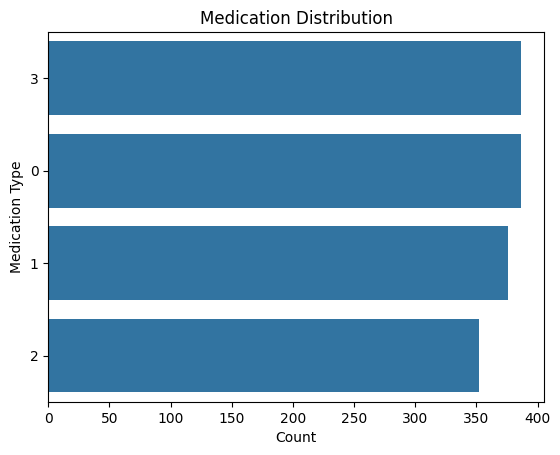

In [21]:
sns.countplot(data=df, y='Medications', order=df['Medications'].value_counts().index)
plt.title("Medication Distribution")
plt.xlabel("Count")
plt.ylabel("Medication Type")
plt.show()

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_scaled, y)


LogisticRegression(max_iter=2000)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = logreg.predict(X_scaled)

print(classification_report(y, y_pred))
print(confusion_matrix(y, y_pred))


              precision    recall  f1-score   support

           0       0.31      0.30      0.30       386
           1       0.32      0.33      0.32       376
           2       0.30      0.17      0.21       352
           3       0.33      0.47      0.39       386

    accuracy                           0.32      1500
   macro avg       0.31      0.32      0.31      1500
weighted avg       0.32      0.32      0.31      1500

[[115 100  45 126]
 [ 95 123  44 114]
 [ 87  85  59 121]
 [ 74  82  49 181]]


In [24]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_scaled, y, cv=5)
print("Cross-Validation Accuracy:", scores.mean())


Cross-Validation Accuracy: 0.2573333333333333


In [34]:
# Select features (you can modify or add more if needed)
feature_cols = [
    'Age',
    'Gender',
    'Ethnicity',
    'Duration of Symptoms (months)',
    'Family History of OCD',
    'Obsession Type',
    'Compulsion Type',
    'Y-BOCS Score (Obsessions)',
    'Y-BOCS Score (Compulsions)',
    'Depression Diagnosis',
    'Anxiety Diagnosis'
]

X = df[feature_cols]
y = df["Medications"]

# Handle missing values (optional: tweak as needed)
X = X.fillna("Unknown")

# Encode all categorical features
for col in X.select_dtypes(include="object").columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# Encode target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

# Save model and label encoder
joblib.dump(model, "ocd_model.pkl")
joblib.dump(le, "label_encoder.pkl")

['label_encoder.pkl']

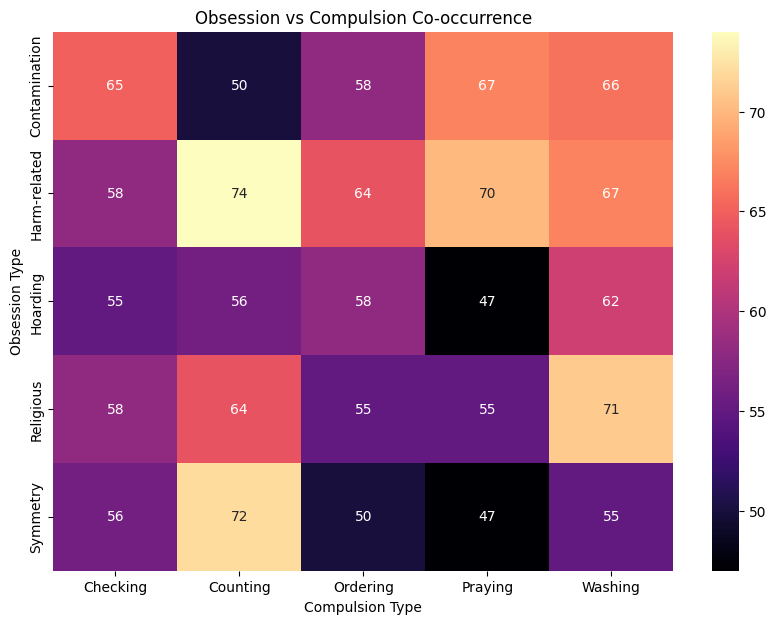

In [26]:
# Cross-tab between Obsession & Compulsion
cross_tab = pd.crosstab(df["Obsession Type"], df["Compulsion Type"])

plt.figure(figsize=(10,7))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="magma")
plt.title("Obsession vs Compulsion Co-occurrence")
plt.xlabel("Compulsion Type")
plt.ylabel("Obsession Type")
plt.show()

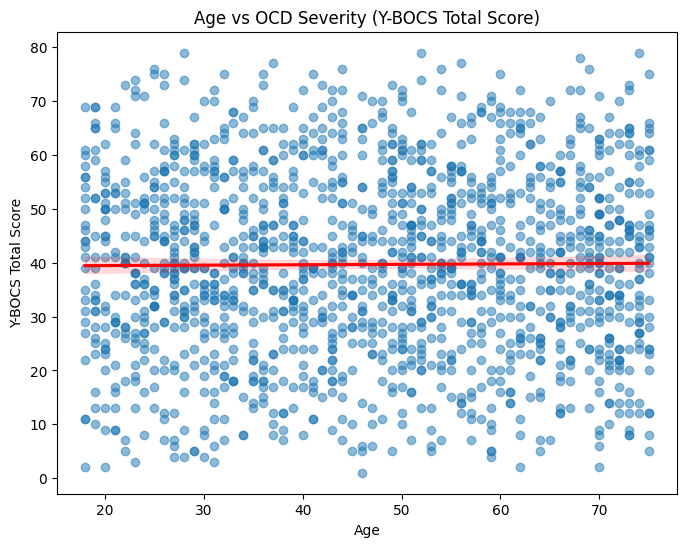

In [33]:
plt.figure(figsize=(8,6))
df['YBOCS_Total'] = df['Y-BOCS Score (Obsessions)'] + df['Y-BOCS Score (Compulsions)']
sns.regplot(x="Age", y="YBOCS_Total", data=df, scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
plt.title("Age vs OCD Severity (Y-BOCS Total Score)")
plt.xlabel("Age")
plt.ylabel("Y-BOCS Total Score")
plt.show()

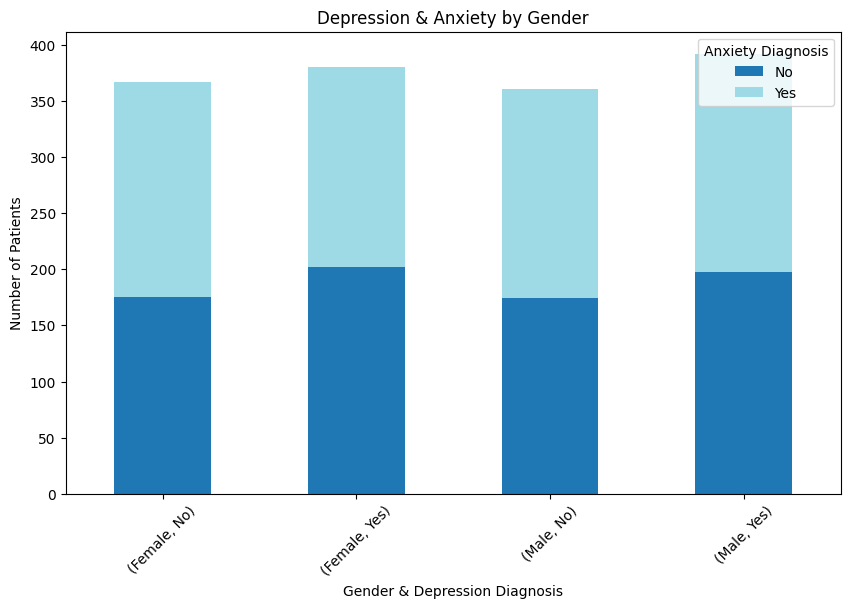

In [29]:
comorbidity_gender = pd.crosstab(index=[df["Gender"], df["Depression Diagnosis"]],
                                 columns=df["Anxiety Diagnosis"])

comorbidity_gender.plot(kind="bar", stacked=True, figsize=(10,6), colormap="tab20")
plt.title("Depression & Anxiety by Gender")
plt.xlabel("Gender & Depression Diagnosis")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-3863927867.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Medications", y="YBOCS_Total", data=df, palette="Set3")


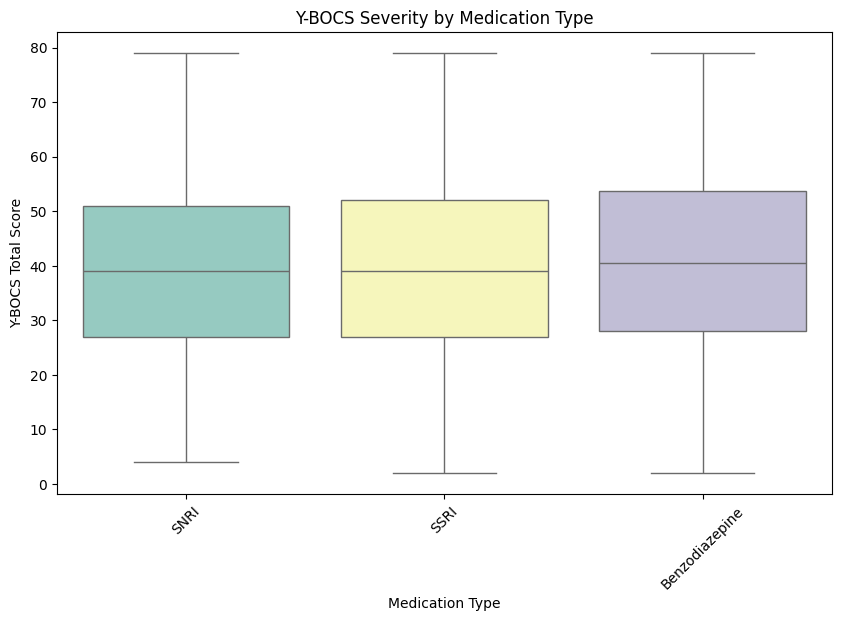

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Medications", y="YBOCS_Total", data=df, palette="Set3")
plt.title("Y-BOCS Severity by Medication Type")
plt.xlabel("Medication Type")
plt.ylabel("Y-BOCS Total Score")
plt.xticks(rotation=45)
plt.show()

<h3>Bubble Plot</h3>

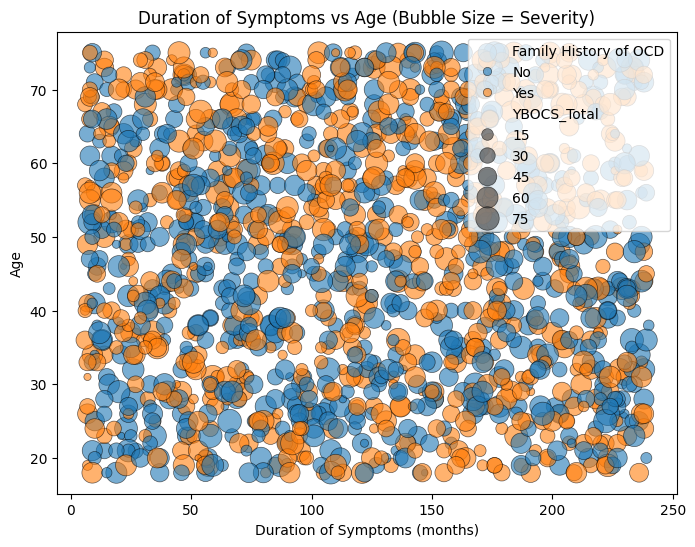

In [32]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="Duration of Symptoms (months)", y="Age",
                size="YBOCS_Total", hue="Family History of OCD",
                data=df, alpha=0.6, sizes=(20, 300), edgecolor="black", linewidth=0.5)
plt.title("Duration of Symptoms vs Age (Bubble Size = Severity)")
plt.xlabel("Duration of Symptoms (months)")
plt.ylabel("Age")
plt.show()

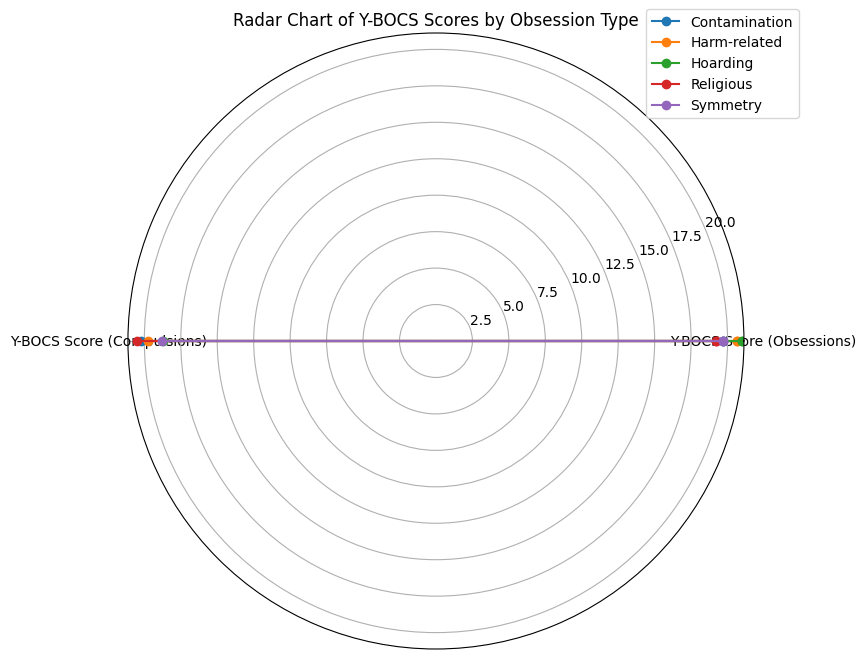

In [35]:
# Average scores grouped by obsession type
radar_data = df.groupby("Obsession Type")[["Y-BOCS Score (Obsessions)", "Y-BOCS Score (Compulsions)"]].mean()

labels = radar_data.columns
num_vars = len(labels)

plt.figure(figsize=(8,8))
for i, (index, row) in enumerate(radar_data.iterrows()):
    values = row.values.flatten().tolist()
    values += values[:1]  # close the circle
    angles = np.linspace(0, 2*np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]
    plt.polar(angles, values, marker='o', label=index)

plt.xticks(angles[:-1], labels)
plt.title("Radar Chart of Y-BOCS Scores by Obsession Type")
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

/tmp/ipython-input-3000377724.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Compulsion Type", y="Age", data=df, palette="muted")


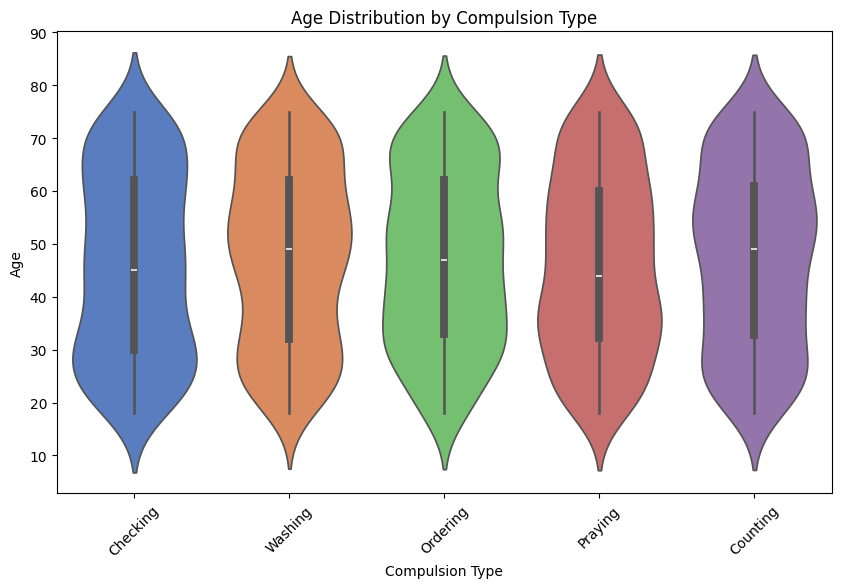

In [36]:
plt.figure(figsize=(10,6))
sns.violinplot(x="Compulsion Type", y="Age", data=df, palette="muted")
plt.title("Age Distribution by Compulsion Type")
plt.xlabel("Compulsion Type")
plt.ylabel("Age")
plt.xticks(rotation=45)
plt.show()

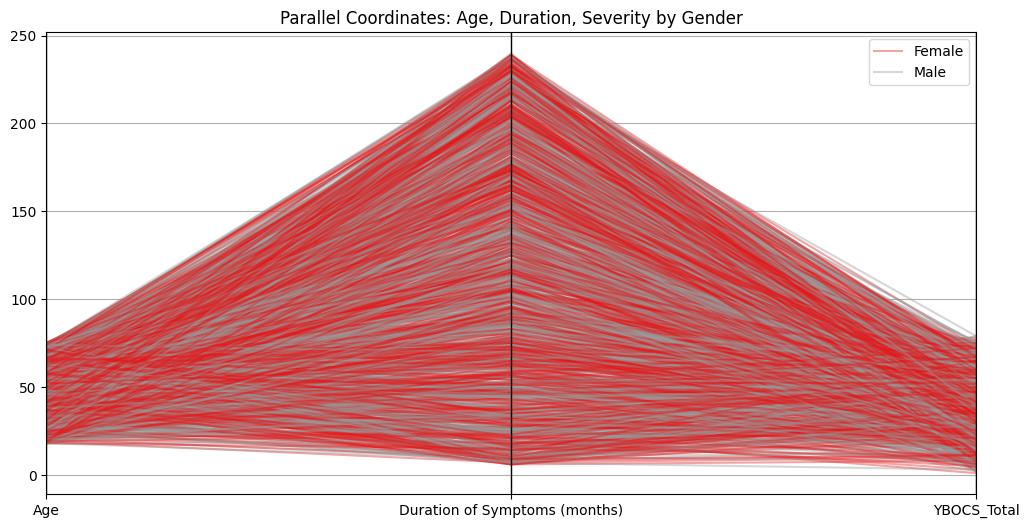

In [37]:
from pandas.plotting import parallel_coordinates

subset = df[["Gender", "Age", "Duration of Symptoms (months)", "YBOCS_Total"]].copy()
subset["Gender"] = subset["Gender"].astype(str)

plt.figure(figsize=(12,6))
parallel_coordinates(subset, "Gender", colormap=plt.cm.Set1, alpha=0.4)
plt.title("Parallel Coordinates: Age, Duration, Severity by Gender")
plt.show()

<Figure size 1000x600 with 0 Axes>

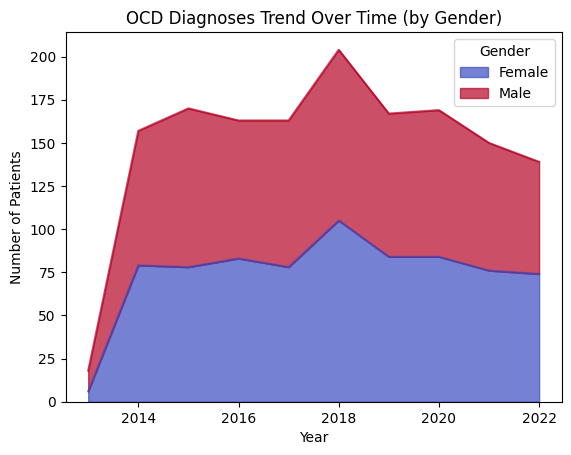

In [38]:
df["Diagnosis Year"] = pd.to_datetime(df["OCD Diagnosis Date"], dayfirst=True, errors="coerce").dt.year
yearly = df.groupby(["Diagnosis Year", "Gender"]).size().unstack(fill_value=0)

plt.figure(figsize=(10,6))
yearly.plot(kind="area", stacked=True, alpha=0.7, colormap="coolwarm")
plt.title("OCD Diagnoses Trend Over Time (by Gender)")
plt.xlabel("Year")
plt.ylabel("Number of Patients")
plt.show()


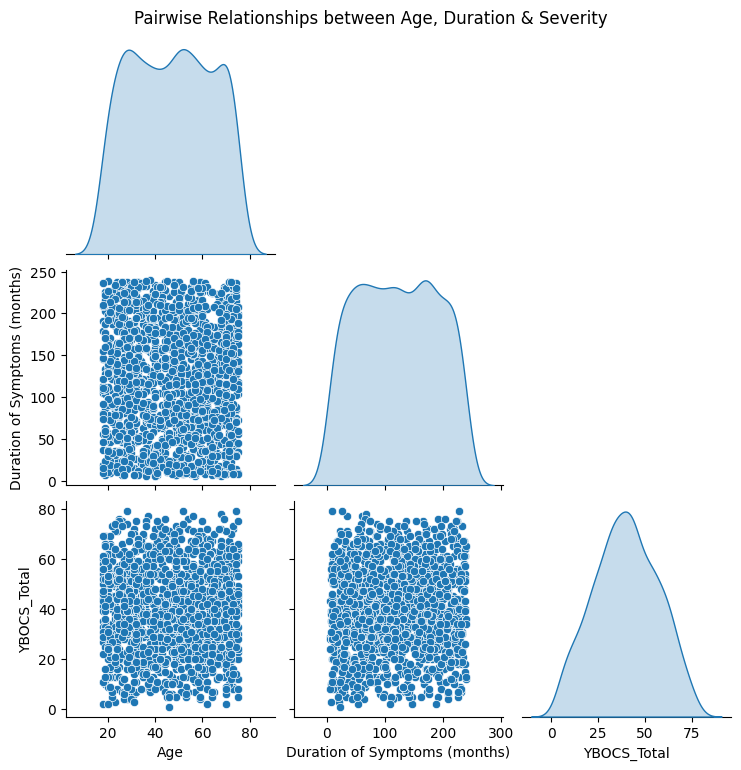

In [40]:
sns.pairplot(df[["Age", "Duration of Symptoms (months)", "YBOCS_Total"]], diag_kind="kde", corner=True)
plt.suptitle("Pairwise Relationships between Age, Duration & Severity", y=1.02)
plt.show()
